In [1]:

%load_ext autoreload
%autoreload 2
from pathlib import Path
from src import Encoder
import matplotlib.pyplot as plt
import numpy as np

In [9]:
with open("test.png", 'rb') as f:
    data = f.read()

encoder = Encoder()
encoder.encode_to_file(data, Path("test.wav"))

Encoded data into test.wav


2025-02-21 00:57:55 [info     ] Read data to encode            data_len_bytes=13
2025-02-21 00:57:55 [info     ] Converted data to bits         data_len_bits=104
2025-02-21 00:57:55 [info     ] Modulated bits to symbols      data_len_symbols=128
2025-02-21 00:57:55 [info     ] Modulated symbols to signal    signal_pts=400


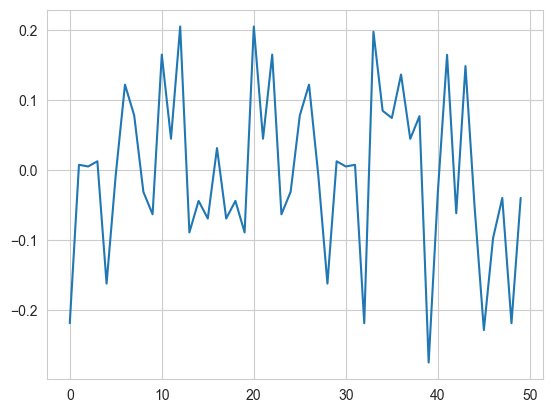

In [13]:
encoder = Encoder(modulation='bpsk') 
signal = encoder.encode(bytearray(b'hello, world!'))

plt.plot(signal[:50])

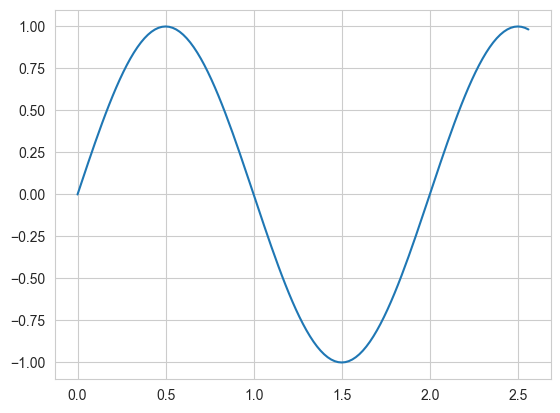

In [88]:
d = 0.02
x = np.arange(0, 2.58, d)
signal = np.sin(np.pi * x)

plt.plot(x, signal)

<class 'numpy.float64'>


(129, 129, 129)

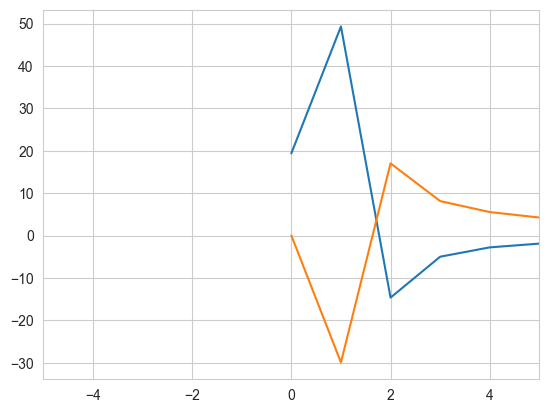

In [94]:
fft = np.fft.fft(signal)
freq = np.fft.fftfreq(len(signal), d=d)

plt.plot(np.arange(len(fft)), np.real(fft))
plt.plot(np.arange(len(fft)), np.imag(fft))
# plt.scatter(freq, np.imag(fft))
plt.xlim(-5, 5)

signal_recon = np.fft.ifft(fft)

print(type(freq[2]))

len(fft), len(signal), len(signal_recon)

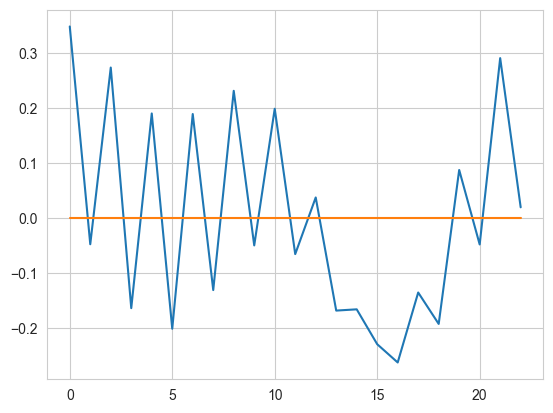

In [68]:
man_fft = np.array([0, 1 - 1j, 1 + 1j, *np.zeros(8), 2 + 1j, 2 - 1j, *np.zeros(8), 1 - 1j, 1 + 1j, ])
man_signal = np.fft.ifft(man_fft)
plt.plot(np.real(man_signal))
plt.plot(np.imag(man_signal))

In [10]:
encoder = Encoder(modulation='bpsk')
# signal = encoder.encode(bytearray(b'hello, world!'))
image = open('test.png', 'rb').read()
encoder.encode_to_file(image, Path("test.png.wav"), sample_rate=8000)

2025-02-21 02:44:46 [info     ] Read data to encode            data_len_bytes=105756
2025-02-21 02:44:46 [info     ] Converted data to bits         data_len_bits=846048
2025-02-21 02:44:46 [info     ] Modulated bits to symbols      data_len_symbols=933632
2025-02-21 02:44:46 [info     ] Modulated symbols to signal    signal_pts=8417276
Encoded data into test.png.wav
